<a href="https://colab.research.google.com/github/ross-hugo/Artwork-GAN/blob/main/Discriminator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # !git clone https://github.com/ross-hugo/Artwork-GAN/
# cd Artwork-GAN/

In [1]:
import os
os.chdir("..")
os.getcwd()

'/Users/rosscopeland/Desktop/school/Machine_Learning_738/projects/Artwork-GAN'

In [2]:
import matplotlib.pyplot as plt
import sys
import numpy as np
from scipy import ndimage

from src.generator import Generator
from src.discriminator import Discriminator
from src.sgan import SGAN

ModuleNotFoundError: No module named 'keras'

In [3]:
BATCH_SIZE = 128

In [4]:
plt.ion()
gan = SGAN(verbosity=False)
gan.discriminator

In [5]:
gan.compile()

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
dir = "images/"

#divide by two because discriminator is taking other half from generator
train_ds = image_dataset_from_directory(dir,
  validation_split=0.2, subset="training",
  seed=123,
  labels="inferred",label_mode="int"
  ,image_size=(128, 128), color_mode= "rgb",
    batch_size=BATCH_SIZE//2)

val_ds = image_dataset_from_directory(dir,
  validation_split=0.2, subset="validation",
  seed=123,
  labels="inferred",label_mode="int"
  ,image_size=(128, 128), color_mode= "rgb",
    batch_size=BATCH_SIZE//2)

Found 8118 files belonging to 49 classes.
Using 6495 files for training.
Found 8118 files belonging to 49 classes.
Using 1623 files for validation.


In [7]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(int(labels[i]))
#         plt.imshow(np.rot90(images[i].numpy().astype('uint8'), 2))
#         plt.show()
#         plt.axis("off")

In [8]:
gan.train(X=train_ds, y=val_ds, epochs=1000, batch_size=BATCH_SIZE)

  0%|          | 0/1000 [00:00<?, ?it/s]

AttributeError: 'list' object has no attribute 'keys'

2


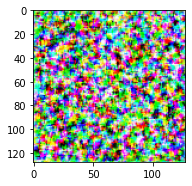

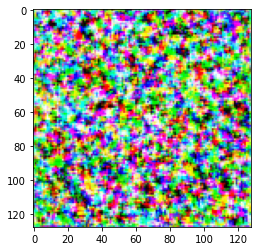

In [14]:
noise = np.random.normal(0,1,(2, 100)) 
print(len(noise))
gen_imgs = gan.generator.predict(noise)
gen_imgs = 127.5 * (gen_imgs + 1)

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    img = gen_imgs[i].astype('uint8')
    plt.imshow(img)
    plt.show()
    plt.imshow(np.rot90(img))
    plt.show()


In [ ]:
#save model here